In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
df_train = pd.read_csv('MELD.Raw/train_sent_emo.csv')
df_test = pd.read_csv('MELD.Raw/test_sent_emo.csv')
df_dev = pd.read_csv('MELD.Raw/dev_sent_emo.csv')

df = pd.concat([df_dev, df_test, df_train])
df['Utterance'] = df.Utterance.str.replace('',"'")

df

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, he's lost it. He's totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,You're a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we won't be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"
...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13708 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        13708 non-null  int64 
 1   Utterance     13708 non-null  object
 2   Speaker       13708 non-null  object
 3   Emotion       13708 non-null  object
 4   Sentiment     13708 non-null  object
 5   Dialogue_ID   13708 non-null  int64 
 6   Utterance_ID  13708 non-null  int64 
 7   Season        13708 non-null  int64 
 8   Episode       13708 non-null  int64 
 9   StartTime     13708 non-null  object
 10  EndTime       13708 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.3+ MB


In [4]:
df.describe()

,Sr No.,Dialogue_ID,Utterance_ID,Season,Episode
count,13708.000000,13708.000000,13708.000000,13708.000000,13708.000000
mean,4145.282536,414.814634,6.082215,4.855632,12.602787
std,3196.348091,319.233845,4.949474,2.362731,7.277891
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1221.000000,125.000000,2.000000,3.000000,6.000000
50%,3309.500000,331.000000,5.000000,5.000000,12.000000
75%,6933.250000,680.000000,9.000000,7.000000,19.000000
max,10478.000000,1038.000000,32.000000,9.000000,25.000000


In [5]:
def preprocess(text):
    text = text.lower()
    t = re.sub('\W+',r' ',text)
    t = re.sub('\d',r'',t)
    t = re.sub('oh|uh','',t)
    stopwords_list = stopwords.words('english') 
    txt = ' '.join([word for word in t.split() if word not in stopwords_list])
    return txt

lemmatizer = WordNetLemmatizer()


df['pre_utt'] = [' '.join([lemmatizer.lemmatize(preprocess(text))])
                 .strip() for text in df['Utterance']]

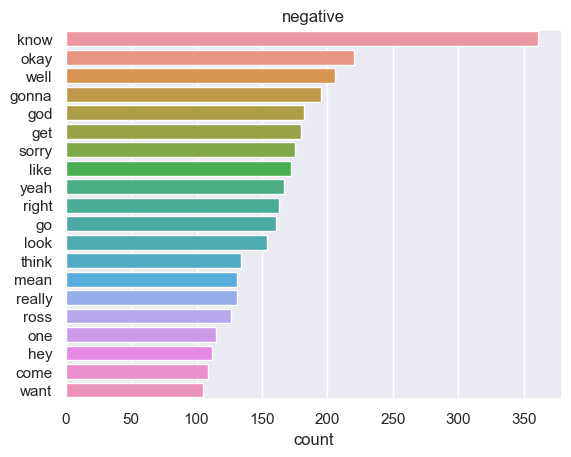

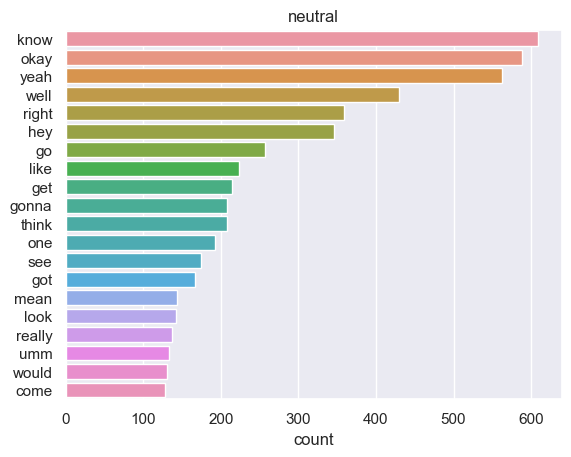

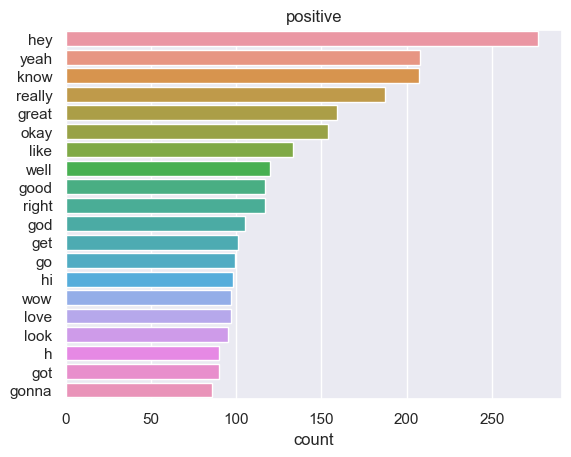

In [6]:
for sentiment in df.Sentiment.unique():
    top20 = pd.DataFrame(pd.Series(' '.join(df[df.Sentiment == sentiment].pre_utt).split()).value_counts()[:20])
    plt.title(sentiment)
    sns.barplot(top20,x='count',y=top20.index)
    plt.show()



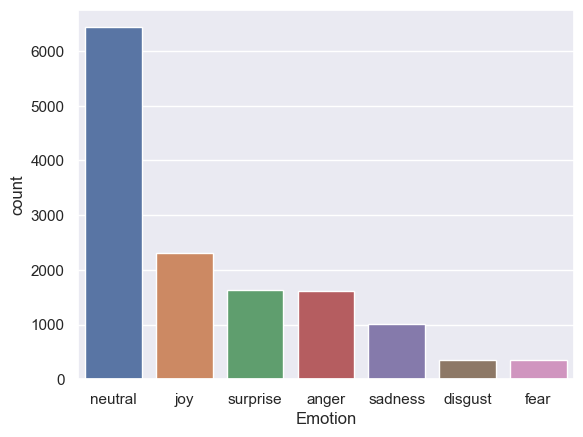

In [7]:
emotion_vc = pd.DataFrame(df.Emotion.value_counts())
sns.barplot(emotion_vc, x=emotion_vc.index, y='count')
plt.show()

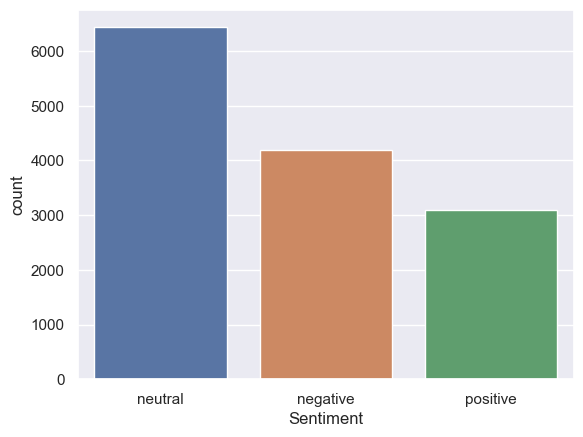

In [8]:
sent_vc = pd.DataFrame(df.Sentiment.value_counts())
sns.barplot(sent_vc, x=sent_vc.index, y='count')
plt.show()

In [9]:
speaker_vc = pd.DataFrame(df.Speaker.value_counts())
speaker_vc

,count
Speaker,
Joey,2069
Ross,2049
Rachel,1955
Phoebe,1797
Monica,1782
...,...
The Librarian,1
Stu,1
Hombre Man,1


In [10]:
speaker_vc = pd.DataFrame(df.Speaker.value_counts())
speaker_vc = speaker_vc[speaker_vc['count'] > 50]


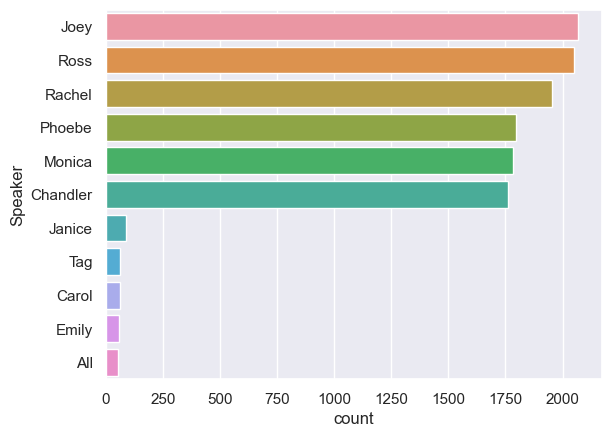

In [11]:
sns.barplot(speaker_vc, y=speaker_vc.index, x='count')
plt.show()

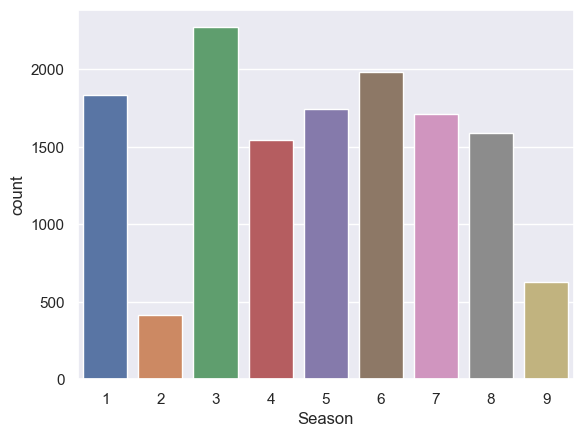

In [12]:
season_vc = pd.DataFrame(df.Season.value_counts())
sns.barplot(season_vc, x=season_vc.index, y='count')
plt.show()

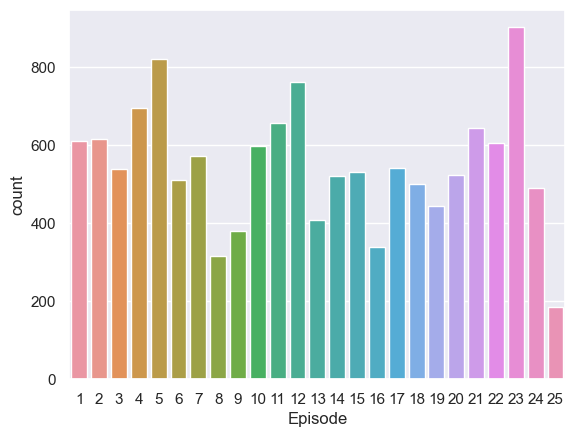

In [13]:
episode_vc = pd.DataFrame(df.Episode.value_counts())
sns.barplot(episode_vc, x=episode_vc.index, y='count')
plt.show()

In [14]:
df['Duration'] = pd.to_datetime(df.EndTime) - pd.to_datetime(df.StartTime)
df['Duration'] = df.Duration.apply(lambda x:pd.Timedelta(x).total_seconds())
df.Duration.describe()

C:\Users\gsevr\AppData\Local\Temp\ipykernel_30612\4294597789.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Duration'] = pd.to_datetime(df.EndTime) - pd.to_datetime(df.StartTime)
C:\Users\gsevr\AppData\Local\Temp\ipykernel_30612\4294597789.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Duration'] = pd.to_datetime(df.EndTime) - pd.to_datetime(df.StartTime)


count    13708.000000
mean         3.164065
std          4.068897
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max        305.000000
Name: Duration, dtype: float64

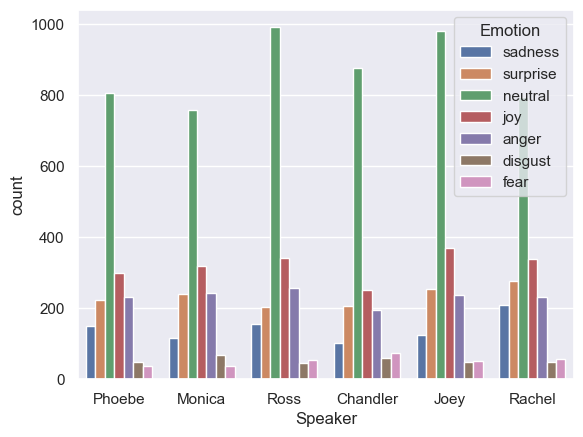

In [15]:
sns.countplot(data=df[(df.Speaker == 'Ross') | 
                      (df.Speaker == 'Chandler') | 
                      (df.Speaker == 'Joey') | 
                      (df.Speaker == 'Rachel') | 
                      (df.Speaker == 'Monica') | 
                      (df.Speaker == 'Phoebe')], x='Speaker', hue='Emotion')
plt.show()

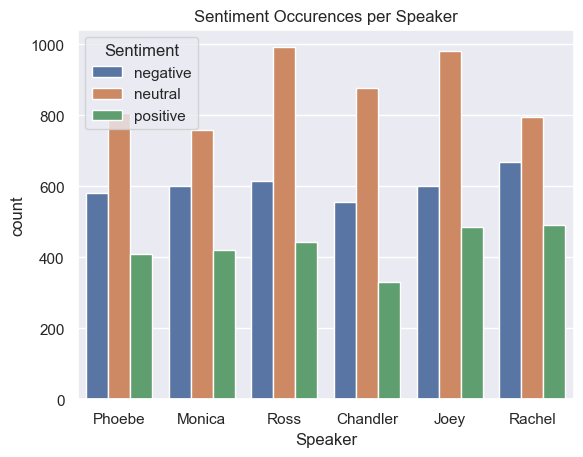

In [18]:
sns.countplot(data=df[(df.Speaker == 'Ross') | 
                      (df.Speaker == 'Chandler') | 
                      (df.Speaker == 'Joey') | 
                      (df.Speaker == 'Rachel') | 
                      (df.Speaker == 'Monica') | 
                      (df.Speaker == 'Phoebe')], x='Speaker', hue='Sentiment')
plt.title('Sentiment Occurences per Speaker')
plt.show()

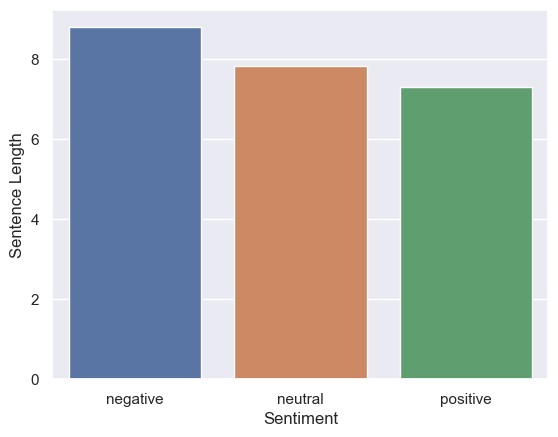

In [17]:
df['Sentence_Length'] = df.Utterance.apply(lambda x: len(x.split()))

emo_len = pd.DataFrame(df.groupby('Sentiment')['Sentence_Length'].mean())

sns.barplot(emo_len,x=emo_len.index,y='Sentence_Length')
plt.ylabel('Sentence Length')
plt.title('Sentence length per Sentiment')
plt.show()